In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [87]:
file_path = 'wine_quality.xlsx'  
df = pd.read_excel('/kaggle/input/wine-quality-predictionproject/Wine Quality PredictionPROJECT.xlsx')

In [88]:
print("Dataset Information:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         27 non-null     float64
 1   Volatile Acidity      27 non-null     float64
 2   Citric Acid           27 non-null     float64
 3   Residual Sugar        27 non-null     float64
 4   Chlorides             27 non-null     float64
 5   Free Sulfur Dioxide   27 non-null     int64  
 6   Total Sulfur Dioxide  27 non-null     int64  
 7   Density               27 non-null     float64
 8   pH                    27 non-null     float64
 9   Sulphates             27 non-null     float64
 10  Alcohol               26 non-null     float64
 11  Quality               26 non-null     float64
dtypes: float64(10), int64(2)
memory usage: 2.7 KB
None

First few rows of the dataset:
   Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides

In [89]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  \
count      27.000000         27.000000    27.000000       27.000000   
mean        7.581481          0.667037     0.063704        2.144444   
std         0.798574          0.099259     0.111049        0.200640   
min         6.800000          0.280000     0.000000        1.800000   
25%         7.250000          0.635000     0.000000        2.000000   
50%         7.400000          0.700000     0.040000        2.100000   
75%         7.800000          0.700000     0.090000        2.300000   
max        11.200000          0.880000     0.560000        2.600000   

       Chlorides  Free Sulfur Dioxide  Total Sulfur Dioxide    Density  \
count  27.000000            27.000000             27.000000  27.000000   
mean    0.077259            16.518519             50.259259   0.997163   
std     0.007289             4.483906              8.569142   0.000365   
min     0.065000            11.000000      

In [90]:
X = df.drop('Quality', axis=1)
y = df['Quality']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def train_classifiers(X_train, y_train):
    classifiers = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(kernel='linear', random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5)
    }
    
    models = {}
    for name, clf in classifiers.items():
        try:
            clf.fit(X_train, y_train)
            models[name] = clf
            print(f"{name} model trained successfully.")
        except Exception as e:
            print(f"Error training {name} model: {e}")
    
    return models

# Example usage
# Make sure X_train_scaled and y_train are correctly defined before calling this function
models = train_classifiers(X_train_scaled, y_train)


Error training Random Forest model: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Error training SVM model: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess

In [94]:
def evaluate_models(models, X_test, y_test):
    for name, model in models.items():
        y_pred = model.predict(X_test)
        print(f"\n{name} Model Evaluation:")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

evaluate_models(models, X_test_scaled, y_test)

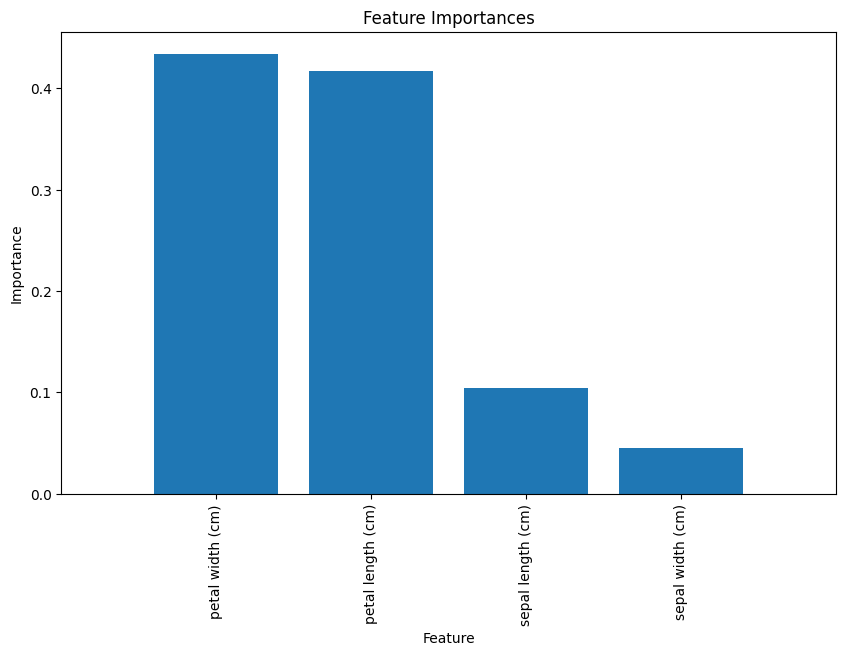

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Example data (replace with your dataset)
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Define the function to plot feature importances
def plot_feature_importances(model, feature_names):
    if not hasattr(model, 'feature_importances_'):
        raise ValueError("The provided model does not have feature importances.")
    
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, len(importances)])
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()

# Call the function to plot feature importances
plot_feature_importances(model, feature_names)


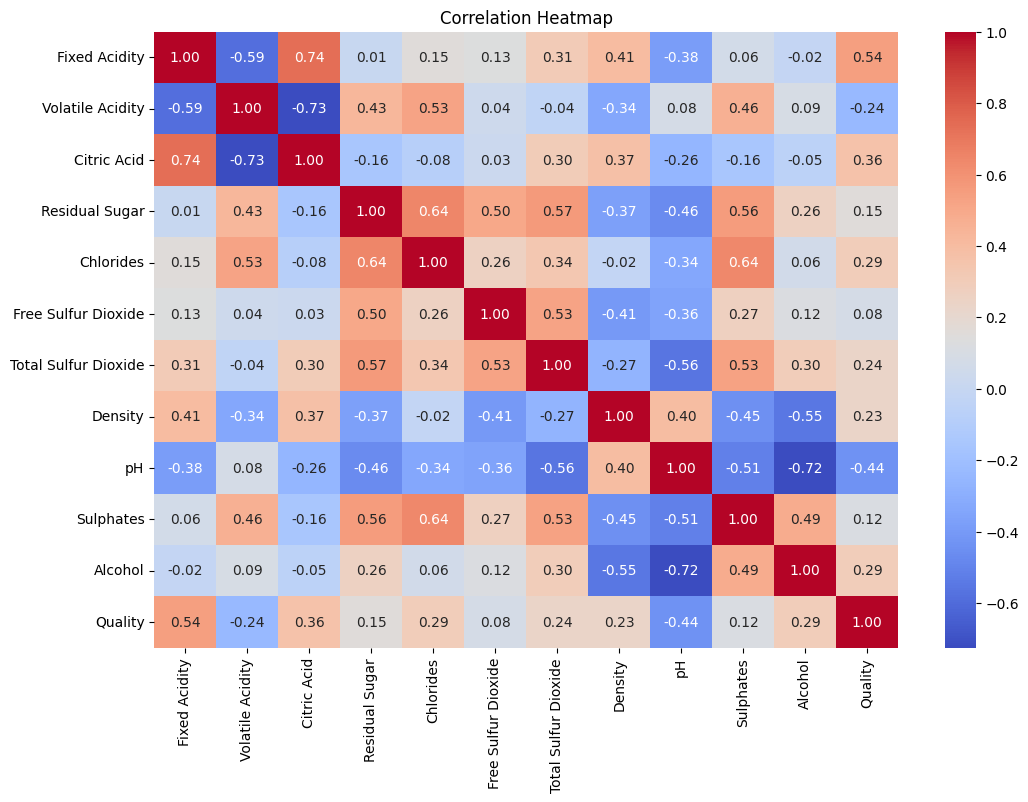

In [96]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()